In [1]:
%cd ~/fur/
import numpy as np
import scipy.signal
from scipy.optimize import minimize
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
from datetime import datetime
plt.rcParams['figure.figsize'] = [15, 7.5]
plt.rcParams.update({'font.size': 16,'legend.fontsize':16})
import seaborn as sns
import sys
import os
import fur.path_assistant as path_assistant
from fur.waveform_reader import read_waveform
from fur.finding_period import get_period
from fur.fluctuations import get_fluctiation_and_noise_var
shift_03_09_2020 = path_assistant.PathAssistant('shift_03_09_2020',      
    ignore_files=["RefCurve_2020-03-10_0_111937_test.Wfm.bin"])
#shift_03_09_2020.show_waveform_file_names()
waveforms_dir = shift_03_09_2020.get_waveforms_dir()


/home/ilobach/fur


In [2]:
wf_files = shift_03_09_2020.get_waveform_files()
test_file = wf_files[0]

In [3]:
t1 = datetime(2020, 3, 9, 21, 16, 0)
t2 = datetime(2020, 3, 9, 21, 37, 0)

In [4]:
wf_paths = [p for p in shift_03_09_2020.get_waveform_paths() if
            (t1 < shift_03_09_2020.get_datetime(os.path.basename(p)) < t2)]
n_files = len(wf_paths)

In [5]:
n_files

31

In [6]:
res_df = pd.DataFrame(columns=["waveform_file","ch2_amplitude","var_of_ch1_amplitude", "noise_var"], index=np.arange(n_files))
res_df["waveform_file"] = [os.path.basename(p) for p in wf_paths]

Started working on the file  RefCurve_2020-03-09_100_211848.Wfm.bin (1/31)


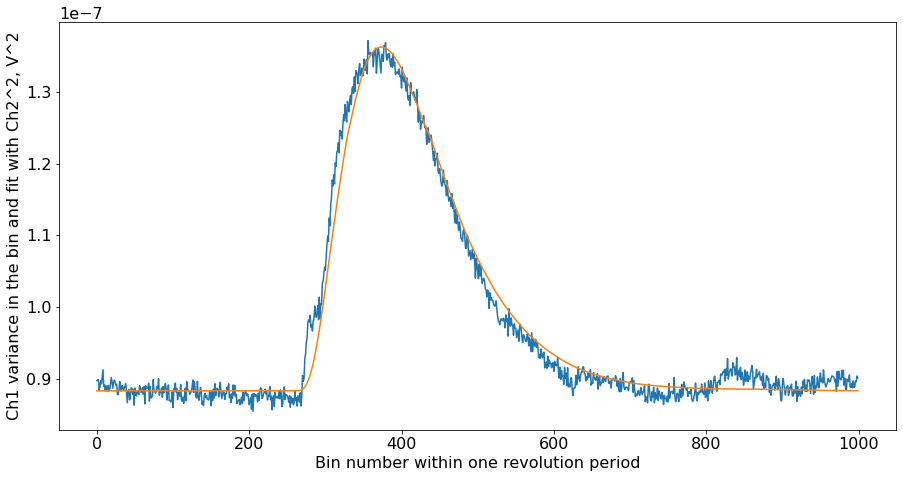

Finished working on  RefCurve_2020-03-09_100_211848.Wfm.bin (1/31)
Started working on the file  RefCurve_2020-03-09_101_211918.Wfm.bin (2/31)


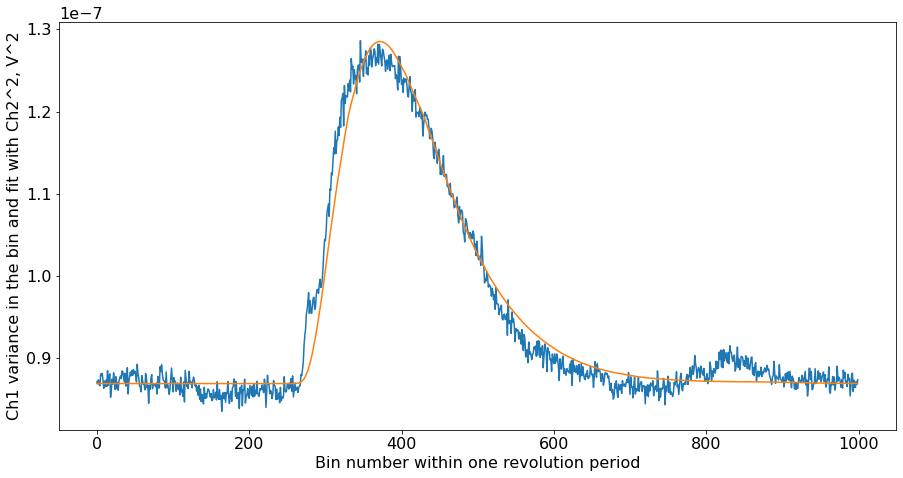

Finished working on  RefCurve_2020-03-09_101_211918.Wfm.bin (2/31)
Started working on the file  RefCurve_2020-03-09_102_211946.Wfm.bin (3/31)


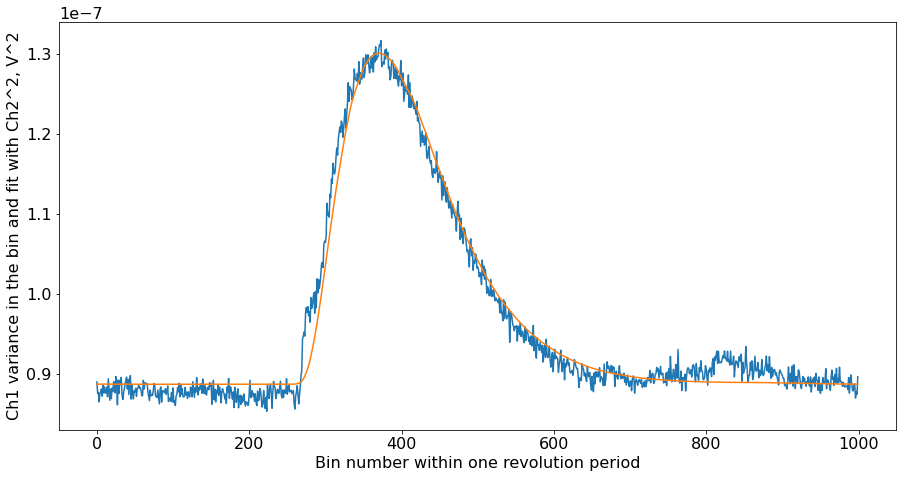

Finished working on  RefCurve_2020-03-09_102_211946.Wfm.bin (3/31)
Started working on the file  RefCurve_2020-03-09_103_212016.Wfm.bin (4/31)


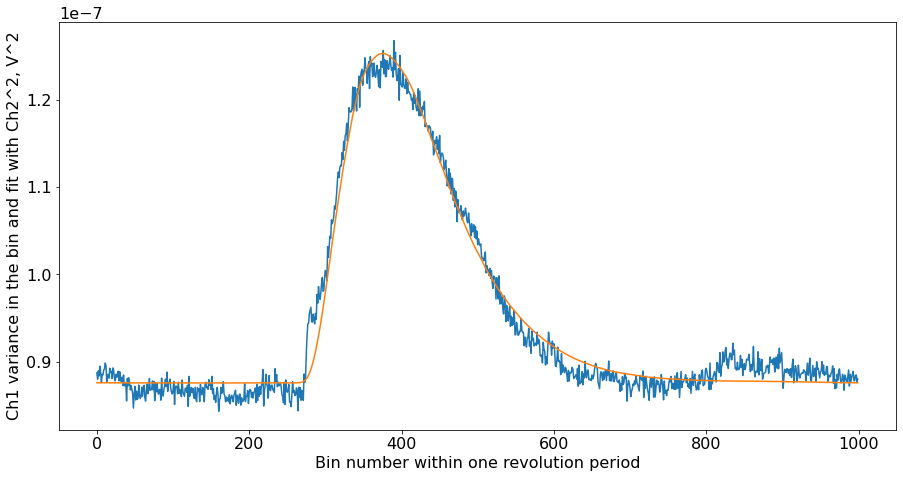

Finished working on  RefCurve_2020-03-09_103_212016.Wfm.bin (4/31)
Started working on the file  RefCurve_2020-03-09_104_212044.Wfm.bin (5/31)


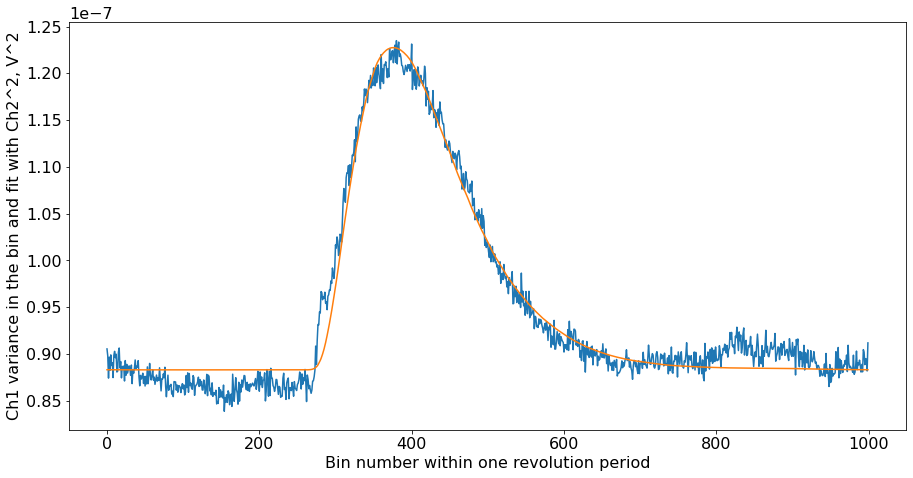

Finished working on  RefCurve_2020-03-09_104_212044.Wfm.bin (5/31)
Started working on the file  RefCurve_2020-03-09_105_212113.Wfm.bin (6/31)


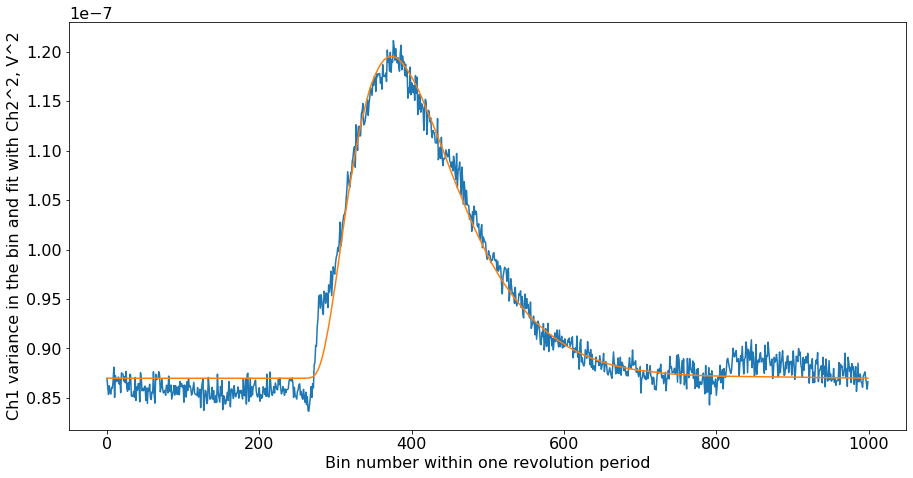

Finished working on  RefCurve_2020-03-09_105_212113.Wfm.bin (6/31)
Started working on the file  RefCurve_2020-03-09_106_212136.Wfm.bin (7/31)


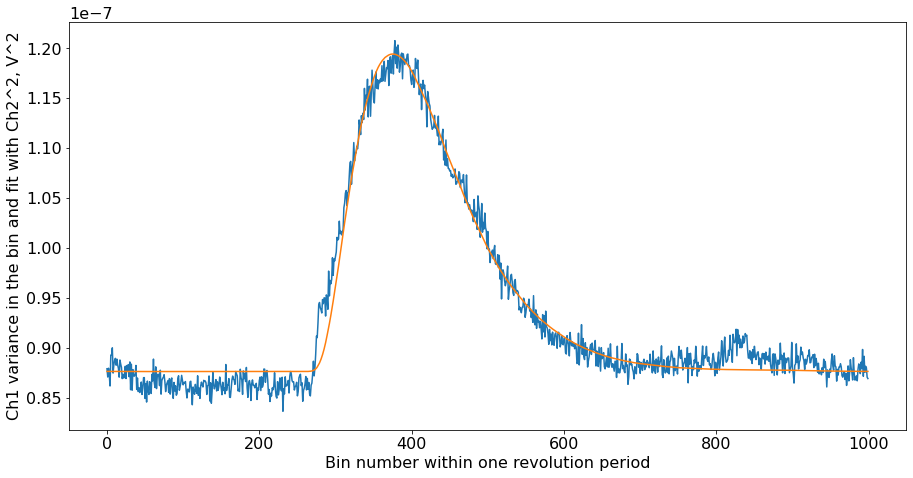

Finished working on  RefCurve_2020-03-09_106_212136.Wfm.bin (7/31)
Started working on the file  RefCurve_2020-03-09_107_212204.Wfm.bin (8/31)


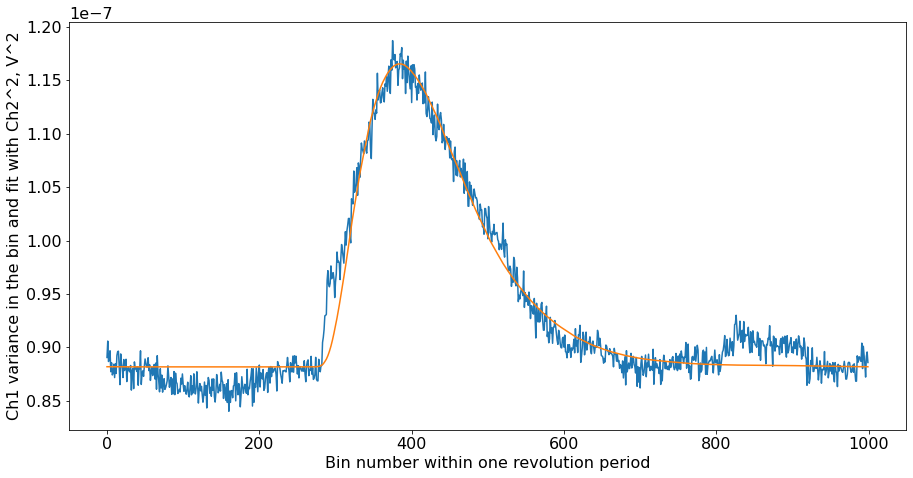

Finished working on  RefCurve_2020-03-09_107_212204.Wfm.bin (8/31)
Started working on the file  RefCurve_2020-03-09_108_212238.Wfm.bin (9/31)


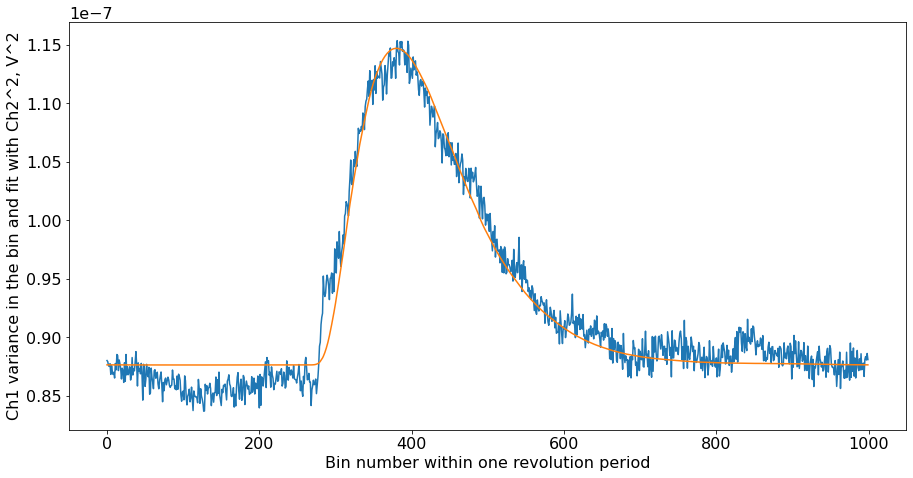

Finished working on  RefCurve_2020-03-09_108_212238.Wfm.bin (9/31)
Started working on the file  RefCurve_2020-03-09_109_212304.Wfm.bin (10/31)


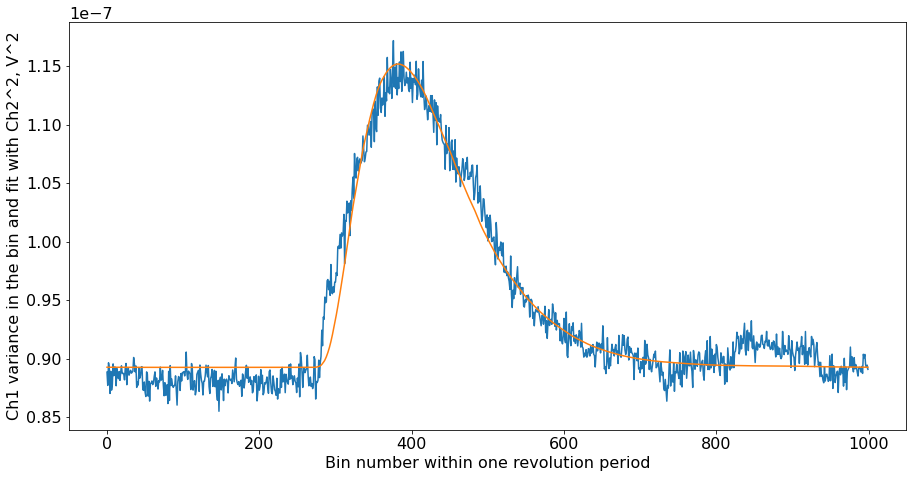

Finished working on  RefCurve_2020-03-09_109_212304.Wfm.bin (10/31)
Started working on the file  RefCurve_2020-03-09_110_212331.Wfm.bin (11/31)


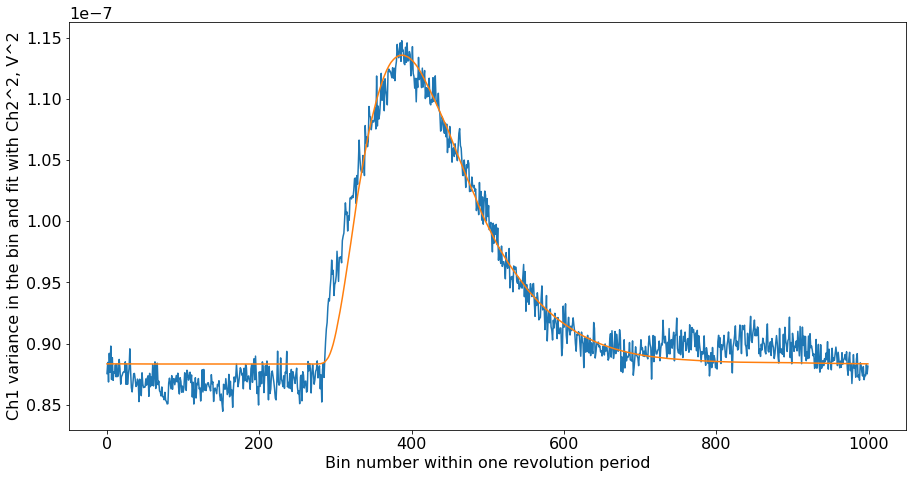

Finished working on  RefCurve_2020-03-09_110_212331.Wfm.bin (11/31)
Started working on the file  RefCurve_2020-03-09_111_212403.Wfm.bin (12/31)


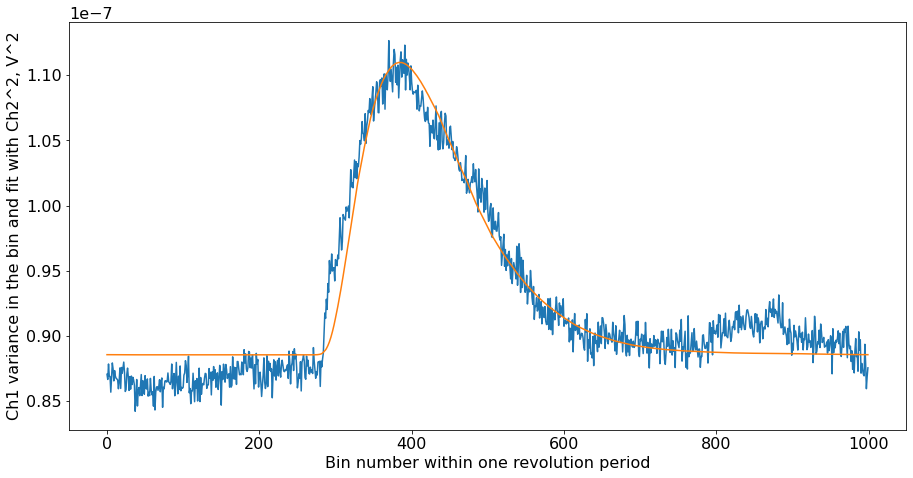

Finished working on  RefCurve_2020-03-09_111_212403.Wfm.bin (12/31)
Started working on the file  RefCurve_2020-03-09_112_212435.Wfm.bin (13/31)


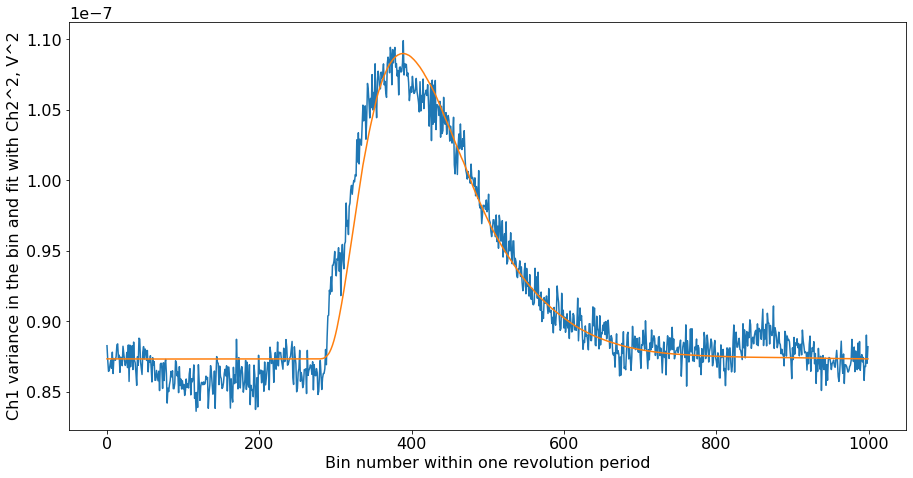

Finished working on  RefCurve_2020-03-09_112_212435.Wfm.bin (13/31)
Started working on the file  RefCurve_2020-03-09_113_212621.Wfm.bin (14/31)


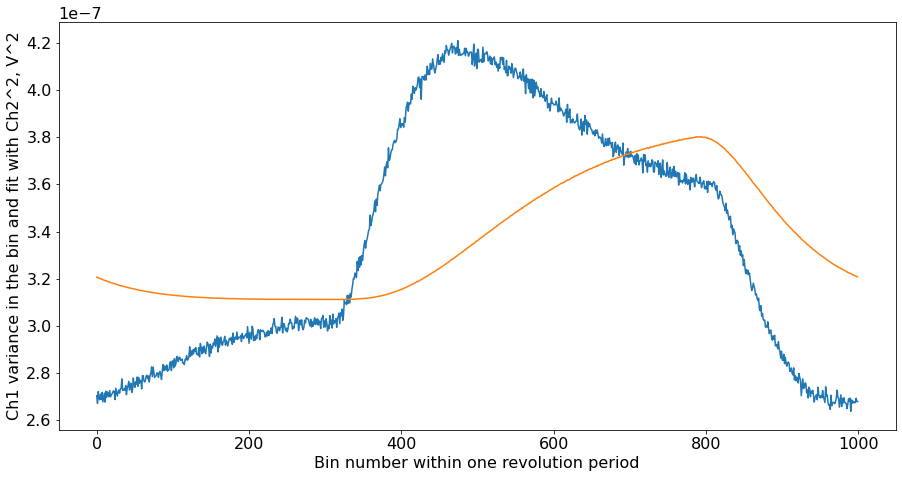

Finished working on  RefCurve_2020-03-09_113_212621.Wfm.bin (14/31)
Started working on the file  RefCurve_2020-03-09_114_212655.Wfm.bin (15/31)


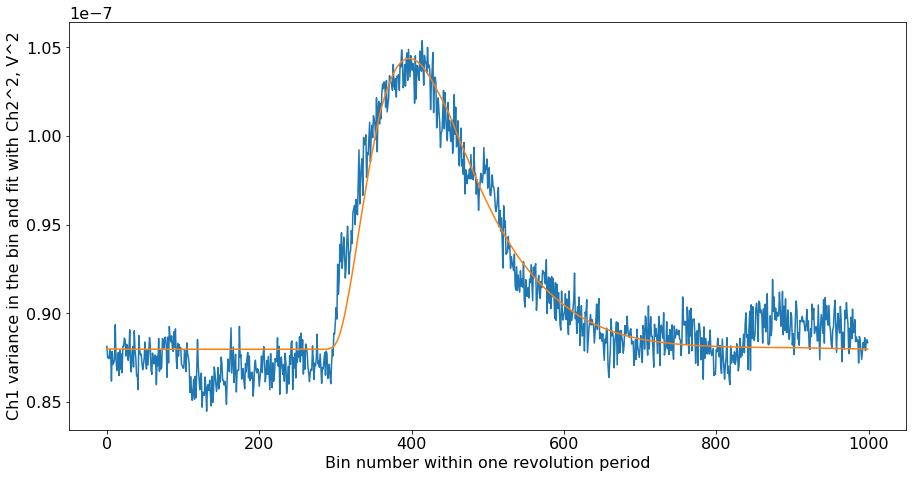

Finished working on  RefCurve_2020-03-09_114_212655.Wfm.bin (15/31)
Started working on the file  RefCurve_2020-03-09_115_212729.Wfm.bin (16/31)


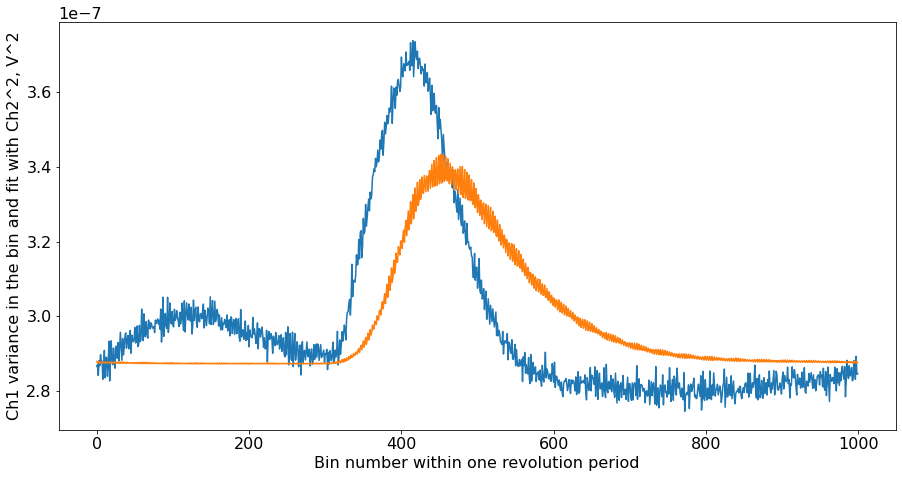

Finished working on  RefCurve_2020-03-09_115_212729.Wfm.bin (16/31)
Started working on the file  RefCurve_2020-03-09_116_212800.Wfm.bin (17/31)


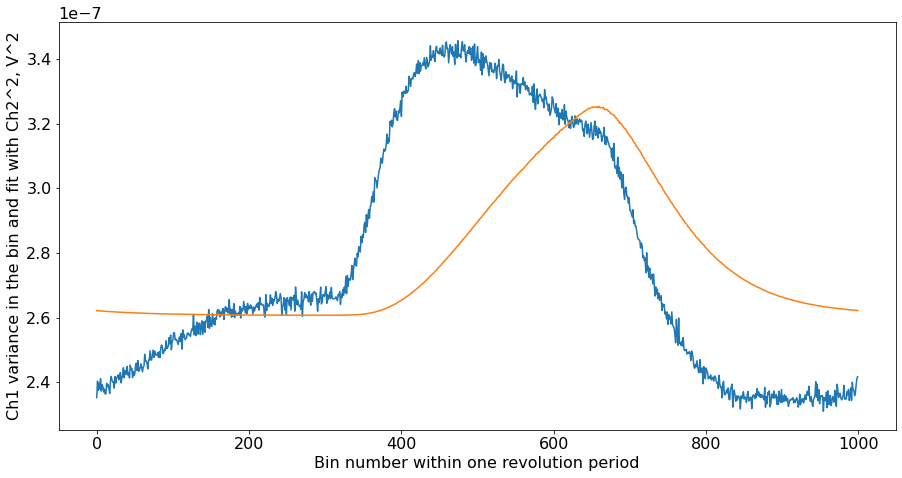

Finished working on  RefCurve_2020-03-09_116_212800.Wfm.bin (17/31)
Started working on the file  RefCurve_2020-03-09_117_212827.Wfm.bin (18/31)


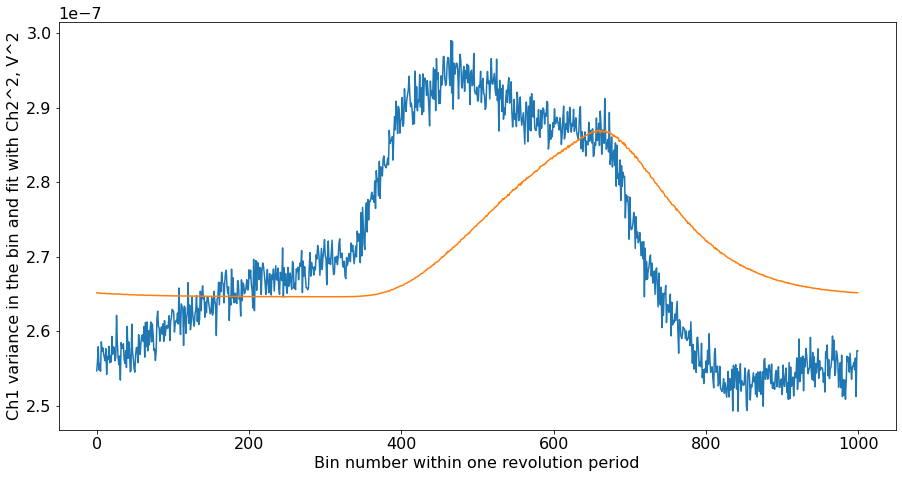

Finished working on  RefCurve_2020-03-09_117_212827.Wfm.bin (18/31)
Started working on the file  RefCurve_2020-03-09_118_212905.Wfm.bin (19/31)


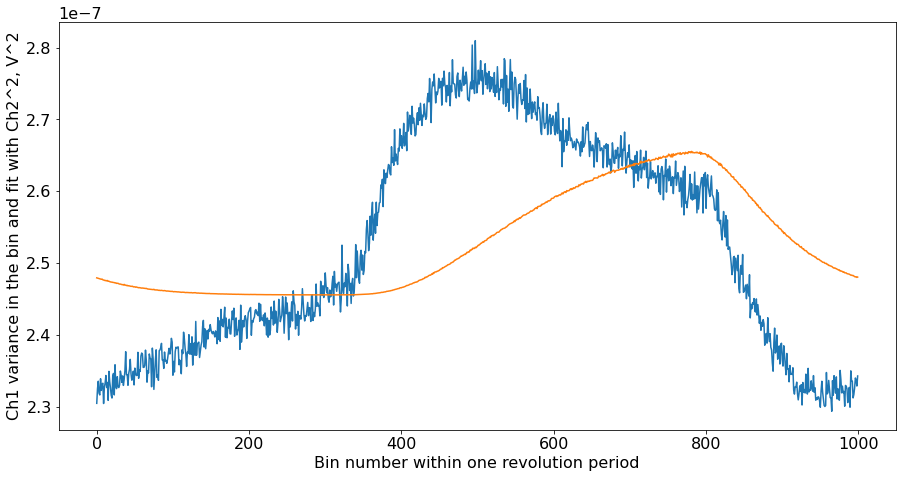

Finished working on  RefCurve_2020-03-09_118_212905.Wfm.bin (19/31)
Started working on the file  RefCurve_2020-03-09_119_212959.Wfm.bin (20/31)


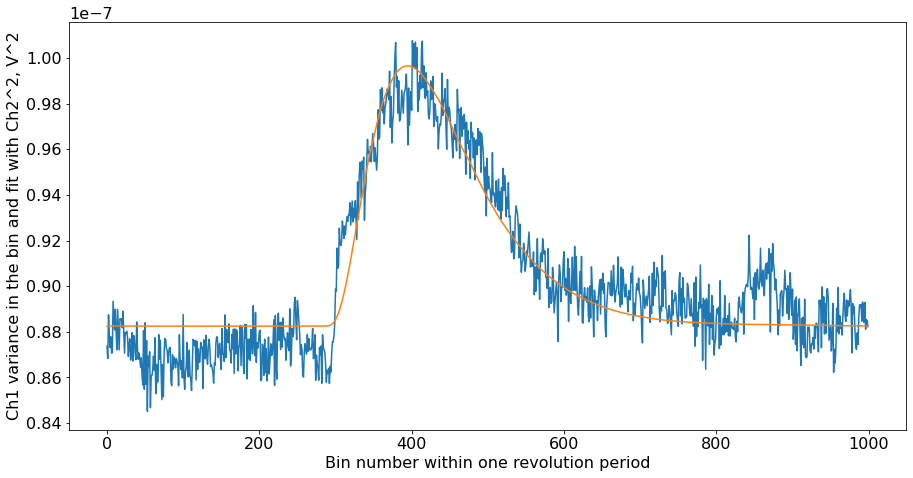

Finished working on  RefCurve_2020-03-09_119_212959.Wfm.bin (20/31)
Started working on the file  RefCurve_2020-03-09_120_213109.Wfm.bin (21/31)


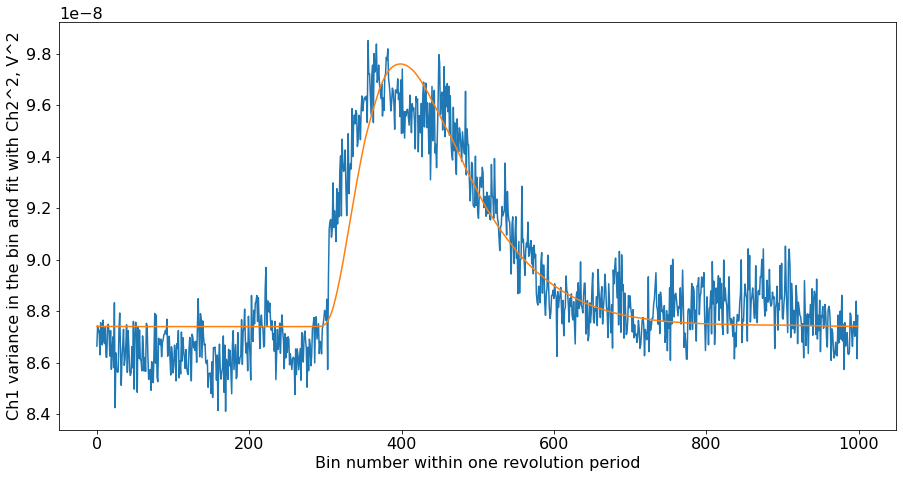

Finished working on  RefCurve_2020-03-09_120_213109.Wfm.bin (21/31)
Started working on the file  RefCurve_2020-03-09_121_213200.Wfm.bin (22/31)


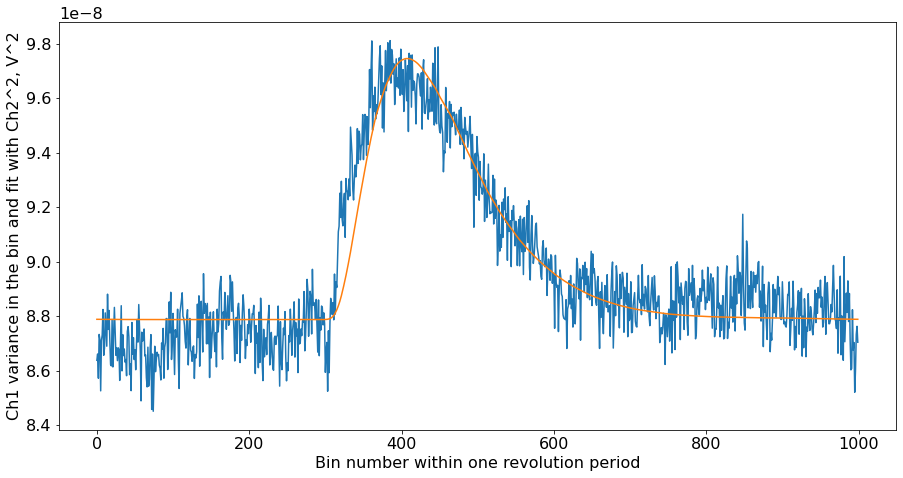

Finished working on  RefCurve_2020-03-09_121_213200.Wfm.bin (22/31)
Started working on the file  RefCurve_2020-03-09_122_213403.Wfm.bin (23/31)


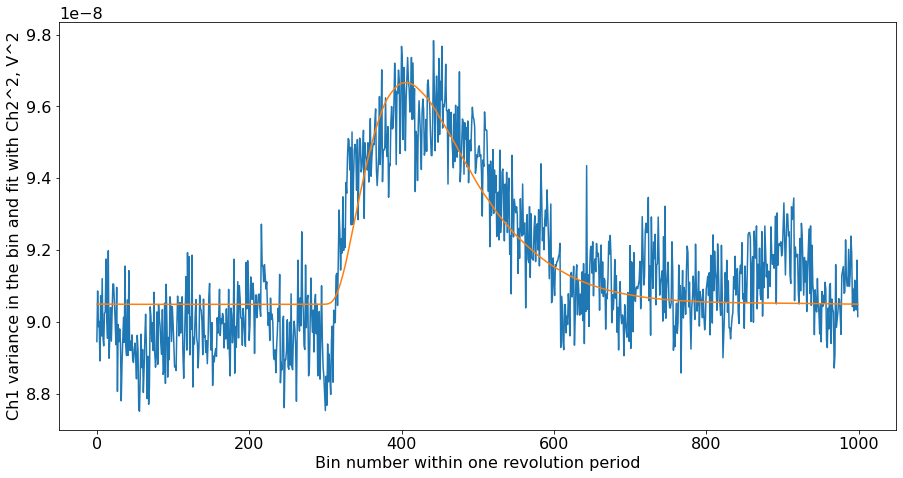

Finished working on  RefCurve_2020-03-09_122_213403.Wfm.bin (23/31)
Started working on the file  RefCurve_2020-03-09_123_213441.Wfm.bin (24/31)


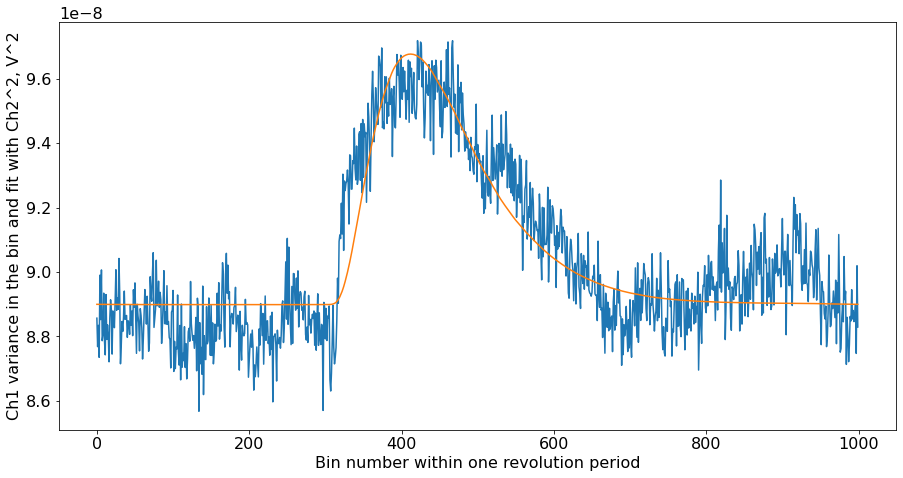

Finished working on  RefCurve_2020-03-09_123_213441.Wfm.bin (24/31)
Started working on the file  RefCurve_2020-03-09_124_213535.Wfm.bin (25/31)


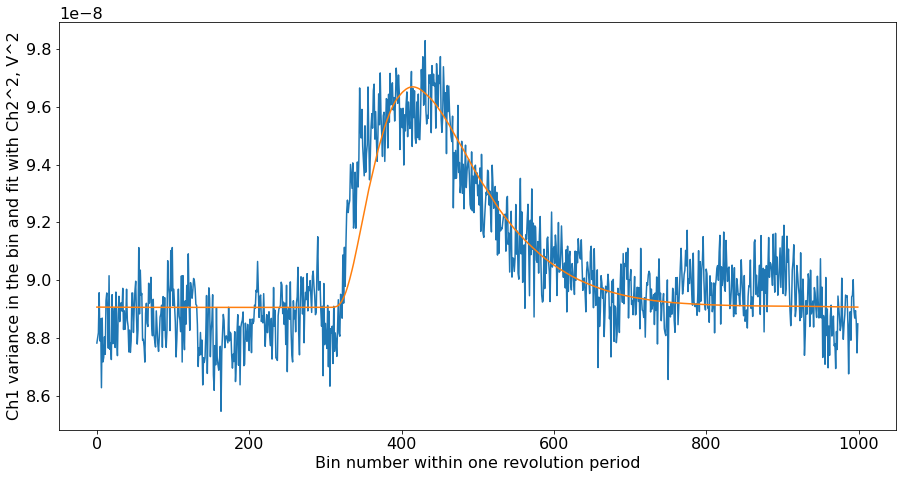

Finished working on  RefCurve_2020-03-09_124_213535.Wfm.bin (25/31)
Started working on the file  RefCurve_2020-03-09_125_213611.Wfm.bin (26/31)


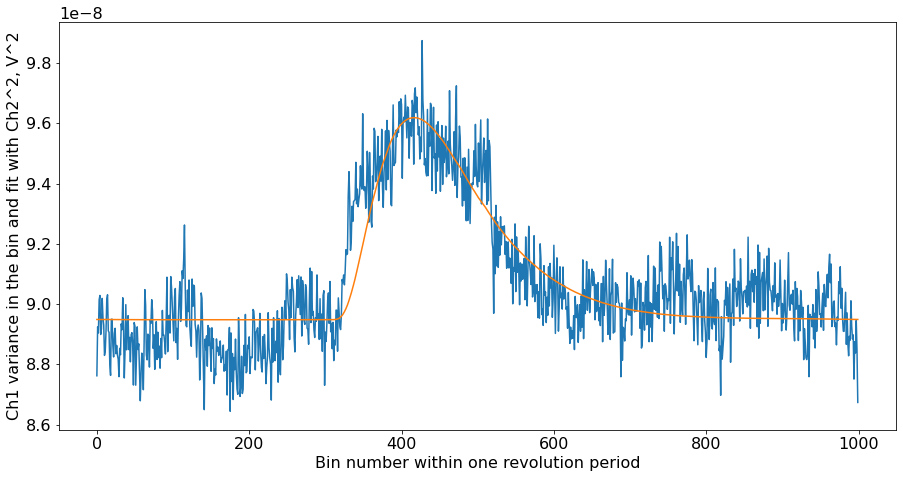

Finished working on  RefCurve_2020-03-09_125_213611.Wfm.bin (26/31)
Started working on the file  RefCurve_2020-03-09_95_211623.Wfm.bin (27/31)


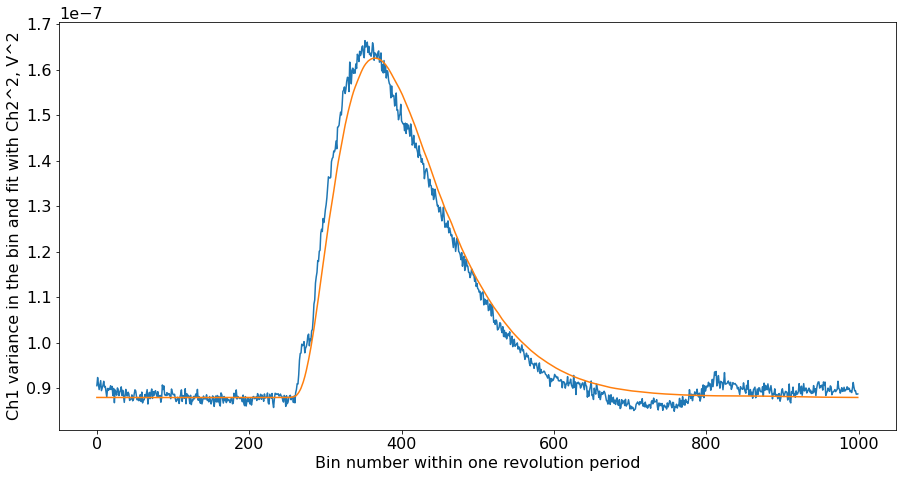

Finished working on  RefCurve_2020-03-09_95_211623.Wfm.bin (27/31)
Started working on the file  RefCurve_2020-03-09_96_211650.Wfm.bin (28/31)


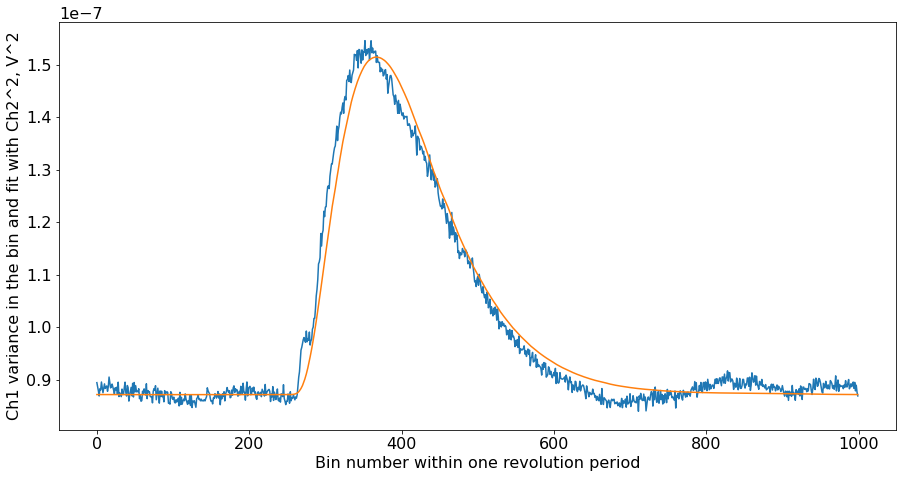

Finished working on  RefCurve_2020-03-09_96_211650.Wfm.bin (28/31)
Started working on the file  RefCurve_2020-03-09_97_211721.Wfm.bin (29/31)


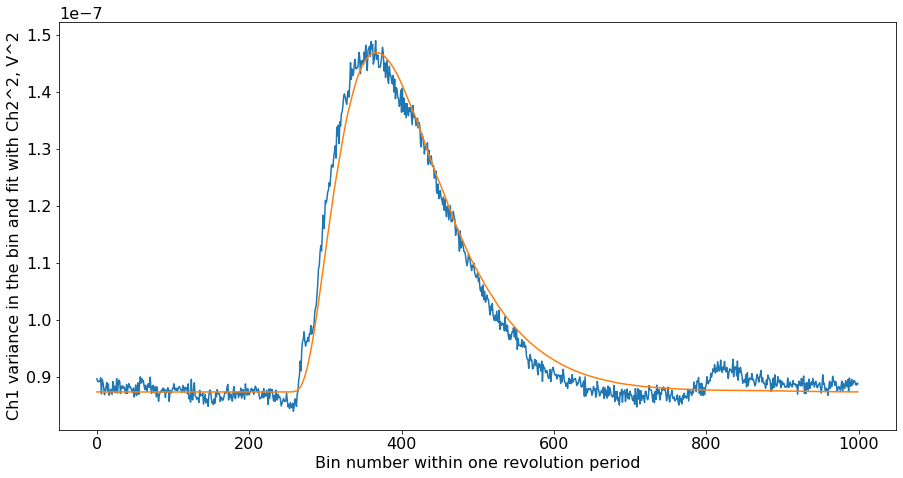

Finished working on  RefCurve_2020-03-09_97_211721.Wfm.bin (29/31)
Started working on the file  RefCurve_2020-03-09_98_211748.Wfm.bin (30/31)


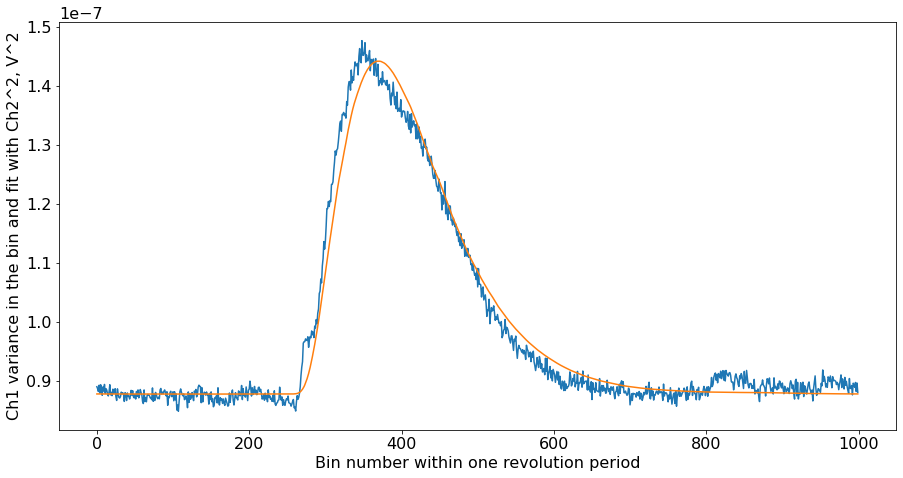

Finished working on  RefCurve_2020-03-09_98_211748.Wfm.bin (30/31)
Started working on the file  RefCurve_2020-03-09_99_211819.Wfm.bin (31/31)


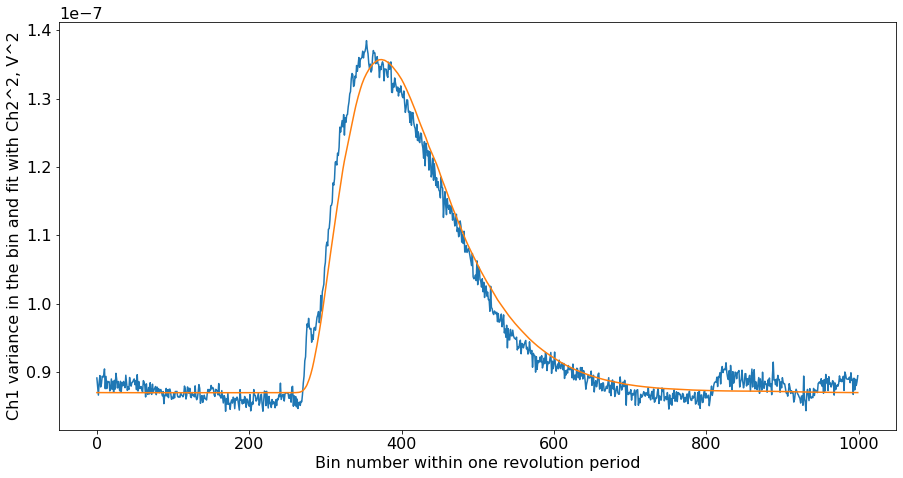

Finished working on  RefCurve_2020-03-09_99_211819.Wfm.bin (31/31)


In [7]:
for i,p in enumerate(wf_paths):
    status = os.path.basename(p)+" ({}/{})".format(i+1,n_files)
    print("Started working on the file ", status)
    try:
        ch1, ch2 = read_waveform(p)
        period = get_period(ch2)
        res_df.iloc[i,1:] =\
            get_fluctiation_and_noise_var(ch1, ch2, period, show_plots=True)
    except Exception as e:
        print("Exception happened: ", e)
    print("Finished working on ", status)

In [8]:
res_df["waveform_file"] = res_df["waveform_file"].astype('str')
for i in range(1,4):
    res_df.iloc[:,i] = res_df.iloc[:,i].astype(np.float32)

In [9]:
res_df.to_csv(waveforms_dir.fi("res_df.csv"))

In [10]:
res_df = pd.read_csv(waveforms_dir.fi("res_df.csv"))

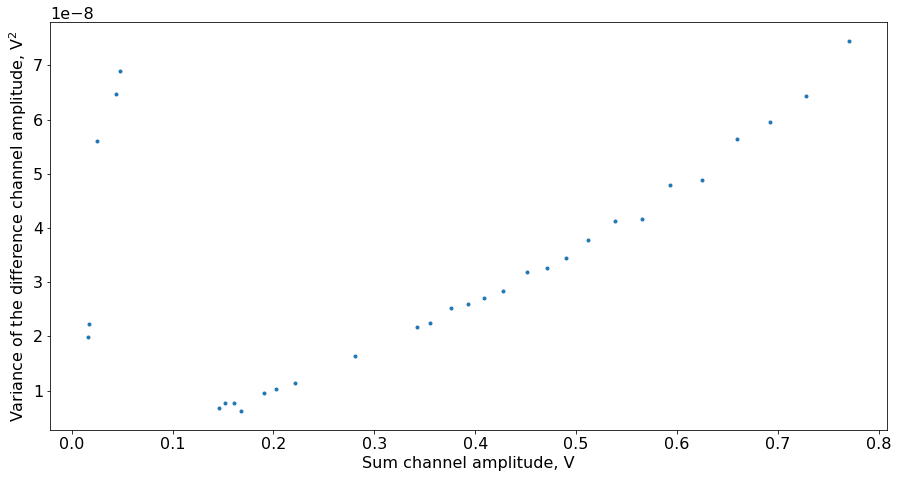

In [11]:
plt.plot(res_df["ch2_amplitude"],res_df["var_of_ch1_amplitude"] ,'.')
plt.xlabel("Sum channel amplitude, V")
plt.ylabel("Variance of the difference channel amplitude, V$^2$")
plt.show()

In [12]:
alpha = 1.6e-19/2e-12*np.sqrt(2)/4
alpha

2.8284271247461904e-08

In [22]:
reg = linear_model.LinearRegression(fit_intercept=False)
x1 = np.insert(res_df["ch2_amplitude"].values,0,0)
x2 = x1**2
y = np.insert(res_df["var_of_ch1_amplitude"].values,0,0)-alpha*x1
reg.fit(x2.reshape((len(x2), 1)), y)
a = reg.coef_[0]
Mf = np.sqrt(2)/(4*a)
Mf

4127970.173990975

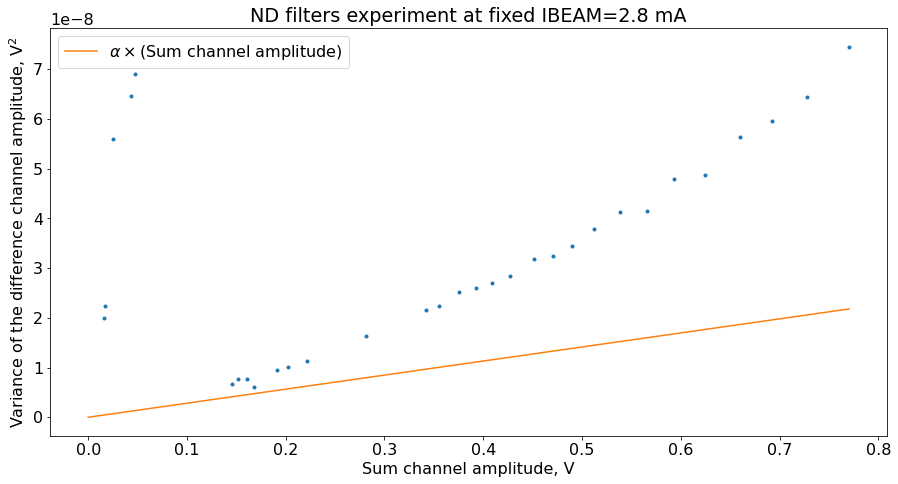

In [14]:
plt.plot(res_df["ch2_amplitude"],res_df["var_of_ch1_amplitude"] ,'.')
x_f = np.linspace(0,max(res_df['ch2_amplitude']),1000)
plt.plot(x_f, alpha*x_f, label=r"$\alpha\times$(Sum channel amplitude)")
plt.xlabel("Sum channel amplitude, V")
plt.ylabel("Variance of the difference channel amplitude, V$^2$")
plt.title("ND filters experiment at fixed IBEAM=2.8 mA")
plt.legend()
plt.show()

$\alpha=\frac{\sqrt{2}e}{4 C_f}$,
it is the predicted slope for the quantum Poisson contribution. - This estimation doesn't take into account attenuation and dispersion in the cable yet. When they are taken into account the agreement might get even better.
$M_f$ is the numer of coherent modes, according to the least squares fit.

$M_f = 4.1\times 10^6$

In [29]:
varN = 1/alpha**2*4*res_df["var_of_ch1_amplitude"].values
N = 1/alpha/np.sqrt(2)*res_df["ch2_amplitude"].values
plt.plot(N,varN,'.')
plt.show()